In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show
import json, os


In [2]:
RAW_PATH = "../data/raw/20241110_053942_45_24f7_3B_AnalyticMS_SR_8b_clip.tif"

In [3]:
# --- Metadata ---
with rasterio.open(RAW_PATH) as src:
    print("CRS:", src.crs)
    print("Shape:", (src.height, src.width))
    print("Bands:", src.count)
    meta = src.meta


CRS: EPSG:32643
Shape: (2130, 2512)
Bands: 8


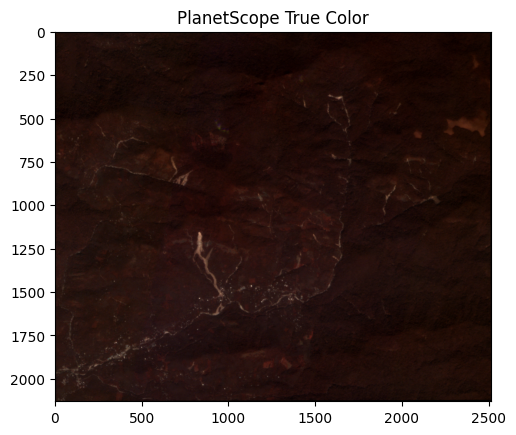

In [4]:
# --- Visualize RGB ---
with rasterio.open(RAW_PATH) as src:
    img = src.read([3, 2, 1])  # RGB
    img = np.moveaxis(img, 0, -1)
plt.imshow(img / img.max())
plt.title("PlanetScope True Color")
plt.show()

In [6]:
with rasterio.open(RAW_PATH) as src:
    meta = src.meta.copy()
    # Convert CRS and transform into serializable forms
    if "crs" in meta and meta["crs"] is not None:
        meta["crs"] = meta["crs"].to_string()
    if "transform" in meta:
        meta["transform"] = list(meta["transform"])  # Convert Affine to list

# ✅ Save safely to JSON
with open("../data/metadata.json", "w") as f:
    json.dump(meta, f, indent=2)

print("✅ Metadata saved successfully!")

✅ Metadata saved successfully!
